In [23]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.datasets import mnist
from keras.utils.np_utils import to_categorical
import random

In [24]:
np.random.seed(0)

In [25]:
(xtrain_data, ytrain_data), (xtest_data, ytest_data) = mnist.load_data()

In [26]:
assert(xtrain_data.shape[0] == ytrain_data.shape[0]), "The number of images is not equal to number of labels."
assert(xtest_data.shape[0] == ytest_data.shape[0]), "The number of images is not equal to number of labels."
assert(xtrain_data.shape[1:] == (28,28)), "The dimentions of image is not equal to 28x28"
assert(xtest_data.shape[1:] == (28,28)), "The dimentions of image is not equal to 28x28"

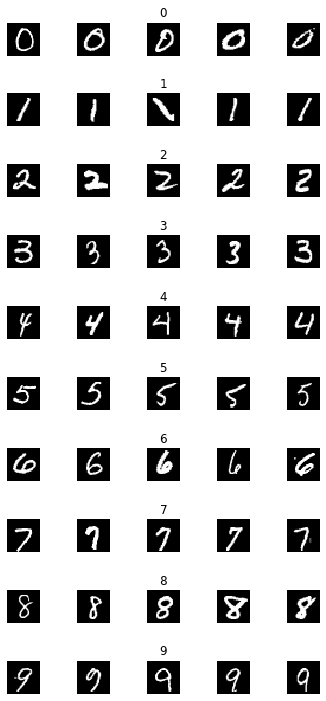

In [27]:
no_of_samples = []
rows = 10
cols = 5

figure, axis = plt.subplots(nrows=rows, ncols=cols, figsize=(5,10))
figure.tight_layout()
for i in range(cols):
    for j in range(rows):
        x_selected = xtrain_data[ytrain_data == j]
        axis[j][i].imshow(x_selected[random.randint(0, len(x_selected-1)), :, :], cmap=plt.get_cmap("gray"))
        axis[j][i].axis("off")
        if i == 2:
            axis[j][i].set_title(str(j))

In [28]:
ytrain_data_encoded = to_categorical(ytrain_data, 10) # one hot encoding
ytest_data_encoded = to_categorical(ytest_data, 10) # one hot encoding

In [29]:
xtrain_data = xtrain_data/255
xtest_data = xtest_data/255

In [32]:
num_pixels = 784
xtrain_data = xtrain_data.reshape(xtrain_data.shape[0], num_pixels)
xtest_data = xtest_data.reshape(xtest_data.shape[0], num_pixels)

In [34]:
print(xtrain_data.shape)

(60000, 784)


In [43]:
def create_model():
    model = Sequential()
    model.add(Dense(10, input_dim=num_pixels, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(rows, activation='softmax'))
    adam = Adam(lr = 0.01)
    model.compile(adam, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [44]:
model = create_model()

In [45]:
history = model.fit(x=xtrain_data, y=ytrain_data_encoded, validation_split=0.1, verbose=1, batch_size=200, epochs=10, shuffle=1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 1s 25us/step - loss: 0.6066 - accuracy: 0.8119 - val_loss: 0.3002 - val_accuracy: 0.9130
Epoch 2/10
54000/54000 [==============================] - 1s 20us/step - loss: 0.3340 - accuracy: 0.9040 - val_loss: 0.2758 - val_accuracy: 0.9195
Epoch 3/10
54000/54000 [==============================] - 1s 20us/step - loss: 0.3020 - accuracy: 0.9132 - val_loss: 0.2592 - val_accuracy: 0.9272
Epoch 4/10
54000/54000 [==============================] - 1s 24us/step - loss: 0.2883 - accuracy: 0.9170 - val_loss: 0.2397 - val_accuracy: 0.9298
Epoch 5/10
54000/54000 [==============================] - 1s 27us/step - loss: 0.2736 - accuracy: 0.9211 - val_loss: 0.2445 - val_accuracy: 0.9323
Epoch 6/10
54000/54000 [==============================] - 2s 31us/step - loss: 0.2656 - accuracy: 0.9226 - val_loss: 0.2387 - val_accuracy: 0.9293
Epoch 7/10
54000/54000 [==============================] - 2s 29us/ste

Text(0.5, 0, 'epoch')

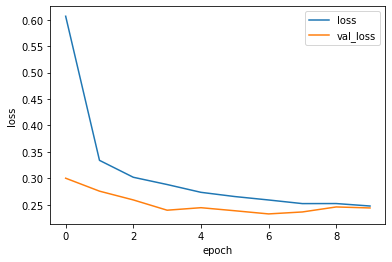

In [46]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

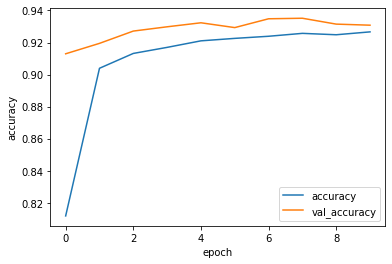

In [47]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')

In [48]:
score = model.evaluate(xtest_data, ytest_data_encoded)
print(score)
print("Test score", score[0])
print("Test accuracy", score[1])

10000/10000 [==============================] - 1s 53us/step
[0.2796063030958176, 0.9186000227928162]
Test score 0.2796063030958176
Test accuracy 0.9186000227928162
